# The Hired Hand

**Machine Learning for Job Placement Prediction**

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Angry-Jay/ML_TheHiredHand/blob/main/ml-the-hired-hand.ipynb)

---

## Table of Contents

1. [Project & Dataset Description](#1-project--dataset-description)
   - [1.1 Project Aim](#11-project-aim)
   - [1.2 Existing Solutions](#12-existing-solutions)
   - [1.3 Dataset Information](#13-dataset-information)
2. [Library Imports](#2-library-imports)
3. [Data Access](#3-data-access)
4. [Dataset Exploratory Analysis](#4-dataset-exploratory-analysis)
   - [4.1 Metadata Analysis](#41-metadata-analysis)
   - [4.2 Missing Values Analysis](#42-missing-values-analysis)
   - [4.3 Feature Distributions, Scaling & Outliers](#43-feature-distributions-scaling--outliers)
   - [4.4 Target Feature Study](#44-target-feature-study)
   - [4.5 Feature Correlation & Selection](#45-feature-correlation--selection)
   - [4.6 Unsupervised Clustering](#46-unsupervised-clustering)
   - [4.7 Interpretations & Conclusions](#47-interpretations--conclusions)
5. [ML Baseline & Ensemble Models](#5-ml-baseline--ensemble-models)
   - [5.1 Train/Validation/Test Splits](#51-trainvalidationtest-splits)
   - [5.2 Pipelines & Models](#52-pipelines--models)
   - [5.3 Training & Validation](#53-training--validation)
   - [5.4 Testing](#54-testing)
   - [5.5 Results Interpretation & Discussion](#55-results-interpretation--discussion)
6. [Enhanced Models & Hyperparameter Tuning](#6-enhanced-models--hyperparameter-tuning)
   - [6.1 Justification of Choices](#61-justification-of-choices)
   - [6.2 Hyperparameter Optimization](#62-hyperparameter-optimization)
   - [6.3 Final Results & Analysis](#63-final-results--analysis)
7. [Conclusion & Future Work](#7-conclusion--future-work)

---

## 1. Project & Dataset Description

### 1.1 Project Aim

This project applies Machine Learning techniques to predict employment outcomes for graduating students using the **Job Placement Dataset**. 

**Primary Objectives:**
- **Predict employment outcomes** (Placed vs. Not Placed) based on demographic, academic, and professional attributes
- **Demonstrate a coherent ML methodology** from data discovery through model optimization
- **Apply comprehensive data analysis** including:
  - Data cleaning and preprocessing
  - Exploratory Data Analysis (EDA)
  - Feature engineering and selection
  - Correlation and clustering analysis
- **Build and evaluate multiple classification models** with proper validation techniques
- **Identify key employability factors** through feature importance analysis and model interpretation
- **Apply ML best practices** including proper train/validation/test splits, pipeline construction, and hyperparameter tuning

---

### 1.2 Existing Solutions

**Traditional Approach:**

Historically, HR departments and educational institutions rely on manual screening processes with heuristic filters (e.g., GPA cutoffs, specific degree specializations, work experience thresholds). This traditional approach has several limitations:
- Time-consuming and difficult to scale
- Subjective and prone to human bias
- Often inaccurate in predicting actual job placement success
- Fails to capture complex interactions between multiple factors

**Machine Learning Solutions:**

Several ML-based approaches exist on platforms like Kaggle and GitHub for placement prediction:

**Common Algorithms Used:**
- **Baseline Models:** Logistic Regression, K-Nearest Neighbors (KNN)
- **Tree-based Models:** Decision Trees, Random Forest, ExtraTrees
- **Boosting Methods:** XGBoost, AdaBoost, Gradient Boosting
- **Support Vector Machines:** SVC with various kernels

**Key Findings from Literature:**
- Tree-based ensemble methods (Random Forest, XGBoost) typically outperform simpler baselines
- Non-linear models better capture feature interactions (e.g., combined effect of GPA and work experience)
- Feature engineering significantly impacts model performance
- Proper handling of class imbalance is crucial for accurate predictions

**Typical Methodology:**
1. Exploratory Data Analysis (distributions, correlations, class imbalance)
2. Preprocessing pipelines (encoding categorical variables, scaling, imputation)
3. Model comparison using multiple metrics: Accuracy, Precision, Recall, F1-Score, ROC-AUC
4. Hyperparameter tuning using GridSearchCV or RandomizedSearchCV
5. Feature importance analysis for interpretability

---

### 1.3 Dataset Information

**Dataset Name:** Job Placement Dataset

**Original Source:** [Kaggle - Job Placement Dataset](https://www.kaggle.com/datasets/ahsan81/job-placement-dataset/data)

**Dataset Characteristics:**
- **Type:** Dense, structured tabular data
- **Size:** Small-to-medium (215 instances, 13 features)
- **Features:** Mix of numeric and categorical variables
- **Target Variable:** Binary classification (Placed / Not Placed)
- **Quality:** Clean with no missing values or duplicates

**Dataset Access:**
- **GitHub Repository:** `https://github.com/Angry-Jay/ML_TheHiredHand`
- **Raw Data URL:** `https://raw.githubusercontent.com/Angry-Jay/ML_TheHiredHand/main/Job_Placement_Data.csv`

**Features Overview:**
- Student demographics (gender)
- Academic performance (SSC %, HSC %, Degree %, MBA %)
- Educational background (SSC board, HSC board, HSC specialization, Degree type, MBA specialization)
- Work experience
- Employment test scores

## 2. Library Imports

In [ ]:
# Setting up
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Model Selection & Tuning
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    train_test_split,
)

# Models
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Metrics
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
)

# Configuration
%matplotlib inline

## 3. Data Access

In [ ]:
DATA_URL = "https://raw.githubusercontent.com/Angry-Jay/ML_TheHiredHand/refs/heads/main/aug_train.csv"

try:
    df = pd.read_csv(DATA_URL)
    
    print("Dataset loaded successfully!")
    print(f"Shape: {df.shape[0]} rows, {df.shape[1]} columns")
    
    display(df.head())
    
except Exception as e:
    print(f"Error loading data from {DATA_URL}")
    print(f"Error details: {e}")

## 4. Dataset Exploratory Analysis

### 4.1 Metadata Analysis

In this section, we analyze the dataset's metadata to understand its structure, data types, quality, and characteristics. This initial exploration helps identify:

- **Dataset dimensions** and scale
- **Feature data types** (numerical vs. categorical)
- **Data quality issues** (duplicates, missing values, irrelevant columns)
- **Statistical properties** of numerical features
- **Potential data leakage** concerns

In [ ]:
# Display dataset info
df.info()

In [ ]:
print("=" * 60)
print("DUPLICATE ANALYSIS")
print("=" * 60)
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    print("\nDuplicate rows:")
    display(df[df.duplicated(keep=False)])
else:
    print("No duplicate rows found.")


In [ ]:
print("=" * 60)
print("FEATURE TYPE SEPARATION")
print("=" * 60)

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumerical features ({len(numerical_cols)}):")
print(numerical_cols)

print(f"\nCategorical features ({len(categorical_cols)}):")
print(categorical_cols)


In [ ]:
print("=" * 60)
print("NUMERICAL FEATURES - STATISTICAL SUMMARY")
print("=" * 60)
display(df[numerical_cols].describe())

In [ ]:
print("=" * 60)
print("CATEGORICAL FEATURES - UNIQUE VALUES")
print("=" * 60)

for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Values: {df[col].unique().tolist()}")

In [ ]:
# Data Leakage Assessment and Target Variable Identification
print("=" * 60)
print("TARGET VARIABLE & DATA LEAKAGE ASSESSMENT")
print("=" * 60)

# Identify the target variable
target_col = 'target'
print(f"\nTarget variable: '{target_col}'")
print(f"Classes: {df[target_col].unique().tolist()}")
print(f"\nClass distribution:")
print(df[target_col].value_counts())
print(f"\nClass proportions:")
print(df[target_col].value_counts(normalize=True).round(3))

# Verify feature composition
print(f"\n--- Feature Inventory ---")
print(f"Total features: {len(df.columns)}")
print(f"  - Predictors: {len(df.columns) - 1}")
print(f"  - Target: 1 ('{target_col}')")

# Check for post-placement features that could leak information
print(f"\n--- Data Leakage Check ---")
suspicious_keywords = ['salary', 'offer', 'package', 'compensation', 'hired']
leakage_found = False

for keyword in suspicious_keywords:
    if any(keyword in col.lower() for col in df.columns):
        print(f"WARNING: Potential leakage feature containing '{keyword}' detected")
        leakage_found = True

if not leakage_found:
    print("No obvious data leakage features detected.")
    print("All features represent information available at prediction time.")

#### Summary

The initial metadata analysis reveals a **substantially larger dataset** compared to typical placement studies, with **19,158 instances** across **14 features** (13 predictors and 1 target). The dataset exhibits **no duplicate records**, ensuring data integrity. However, **missing values are present** in several features, with the most significant gaps in `company_type` (6,140 missing, 32.1%), `company_size` (5,938 missing, 31.0%), `major_discipline` (2,813 missing, 14.7%), and `gender` (4,508 missing, 23.5%). This necessitates careful imputation strategies or missing value handling during preprocessing.

The feature composition consists of **2 numerical predictors** (`city_development_index` and `training_hours`) and **10 categorical predictors** representing demographics, education, and employment history. Additionally, `enrollee_id` serves as a unique identifier and must be excluded from modeling, while `target` is the binary outcome variable. Categorical features exhibit **varying cardinality**: low cardinality for binary features like `relevent_experience` (2 values) and `gender` (3 values including missing), moderate cardinality for features like `education_level` (5 levels) and `major_discipline` (6 disciplines), and **high cardinality** for `city` (123 unique cities) and `experience` (22 levels), which may require specialized encoding techniques such as target encoding or frequency encoding.

The target variable exhibits **significant class imbalance**, with **75.1% of candidates not looking for job change** (class 0) and only **24.9% actively seeking change** (class 1), yielding an imbalance ratio of **3.01:1**. This substantial imbalance must be addressed during model training through techniques such as class weighting, resampling (SMOTE/undersampling), or using evaluation metrics robust to imbalance (F1-score, ROC-AUC, precision-recall curves). **No data leakage concerns** were identified; all features represent information collected during training enrollment, ensuring model validity for predicting actual job change intentions.

### 4.2 Missing Values Analysis

In [ ]:
print("=" * 60)
print("MISSING VALUES ANALYSIS")
print("=" * 60)

# Missing values count
missing_counts = df.isnull().sum()
print("\nMissing values per feature:")
print(missing_counts)

# Missing values percentage
print("\n" + "=" * 60)
print("MISSING VALUES PERCENTAGE")
print("=" * 60)
missing_percentages = (df.isnull().sum() / len(df) * 100).round(2)
print(missing_percentages)

# Summary statistics
total_missing = df.isnull().sum().sum()
total_cells = df.shape[0] * df.shape[1]
print("\n" + "=" * 60)
print("SUMMARY")
print("=" * 60)
print(f"Total missing values: {total_missing}")
print(f"Total cells: {total_cells}")
print(f"Overall missingness: {(total_missing / total_cells * 100):.2f}%")
print(f"Features with missing values: {(missing_counts > 0).sum()} out of {len(df.columns)}")
print(f"Complete features: {(missing_counts == 0).sum()} out of {len(df.columns)}")

In [ ]:
# Visualize missing values
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot of missing values
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

if len(missing_data) > 0:
    axes[0].bar(range(len(missing_data)), missing_data.values, edgecolor='black', alpha=0.7, color='orange')
    axes[0].set_xticks(range(len(missing_data)))
    axes[0].set_xticklabels(missing_data.index, rotation=45, ha='right')
    axes[0].set_title('Missing Values Count by Feature', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Features')
    axes[0].set_ylabel('Number of Missing Values')
    axes[0].grid(axis='y', alpha=0.3)
    
    # Add count labels
    for i, v in enumerate(missing_data.values):
        axes[0].text(i, v + 100, str(v), ha='center', va='bottom')
else:
    axes[0].text(0.5, 0.5, 'No Missing Values', ha='center', va='center', fontsize=14)
    axes[0].set_xlim(0, 1)
    axes[0].set_ylim(0, 1)

# Percentage plot
missing_pct = (df.isnull().sum() / len(df) * 100).round(2)
missing_pct = missing_pct[missing_pct > 0].sort_values(ascending=False)

if len(missing_pct) > 0:
    axes[1].bar(range(len(missing_pct)), missing_pct.values, edgecolor='black', alpha=0.7, color='red')
    axes[1].set_xticks(range(len(missing_pct)))
    axes[1].set_xticklabels(missing_pct.index, rotation=45, ha='right')
    axes[1].set_title('Missing Values Percentage by Feature', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Features')
    axes[1].set_ylabel('Percentage (%)')
    axes[1].grid(axis='y', alpha=0.3)
    
    # Add percentage labels
    for i, v in enumerate(missing_pct.values):
        axes[1].text(i, v + 0.5, f'{v}%', ha='center', va='bottom')
else:
    axes[1].text(0.5, 0.5, 'No Missing Values', ha='center', va='center', fontsize=14)
    axes[1].set_xlim(0, 1)
    axes[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

In [ ]:
# Missing value pattern analysis
print("=" * 60)
print("MISSING VALUE PATTERNS")
print("=" * 60)

# Features with missing values
features_with_missing = df.columns[df.isnull().any()].tolist()

if len(features_with_missing) > 0:
    print(f"\nFeatures with missing values ({len(features_with_missing)}): {features_with_missing}")
    
    # Check co-occurrence of missing values
    print("\n" + "=" * 60)
    print("CO-OCCURRENCE OF MISSING VALUES")
    print("=" * 60)
    
    # Check common combinations
    if 'company_size' in features_with_missing and 'company_type' in features_with_missing:
        both_missing = df['company_size'].isnull() & df['company_type'].isnull()
        print(f"\ncompany_size AND company_type both missing: {both_missing.sum()} ({both_missing.sum() / len(df) * 100:.2f}%)")
    
    if 'company_size' in features_with_missing and 'company_type' in features_with_missing and 'experience' in features_with_missing:
        all_three = df['company_size'].isnull() & df['company_type'].isnull() & df['experience'].isnull()
        print(f"company_size AND company_type AND experience all missing: {all_three.sum()} ({all_three.sum() / len(df) * 100:.2f}%)")
    
    # Distribution of missing counts per row
    print("\n" + "=" * 60)
    print("MISSING VALUES PER ROW DISTRIBUTION")
    print("=" * 60)
    missing_per_row = df.isnull().sum(axis=1)
    print(f"\nMissing values distribution:")
    print(missing_per_row.value_counts().sort_index())
    
    # Rows with any missing value
    rows_with_missing = df.isnull().any(axis=1).sum()
    print(f"\n--- Summary ---")
    print(f"Total rows with at least one missing value: {rows_with_missing} ({rows_with_missing / len(df) * 100:.2f}%)")
    
    # Rows with all values complete
    complete_rows = (~df.isnull().any(axis=1)).sum()
    print(f"Complete rows (no missing values): {complete_rows} ({complete_rows / len(df) * 100:.2f}%)")
    
    # Most common missing value patterns
    print("\n" + "=" * 60)
    print("TOP 5 MISSING VALUE PATTERNS")
    print("=" * 60)
    missing_patterns = df[features_with_missing].isnull().astype(int)
    pattern_counts = missing_patterns.groupby(features_with_missing).size().sort_values(ascending=False).head(5)
    
    for idx, (pattern, count) in enumerate(pattern_counts.items(), 1):
        missing_features = [feat for feat, is_missing in zip(features_with_missing, pattern) if is_missing == 1]
        if missing_features:
            print(f"\n{idx}. Missing: {missing_features}")
            print(f"   Count: {count} ({count / len(df) * 100:.2f}%)")
        else:
            print(f"\n{idx}. No missing values")
            print(f"   Count: {count} ({count / len(df) * 100:.2f}%)")
            
else:
    print("\nNo missing values detected in the dataset.")

#### Summary

The missing values analysis reveals **significant data incompleteness** affecting **53.26% of all rows** (10,203 instances), while only **46.74%** (8,955 instances) are complete. Out of **14 features**, **8 contain missing values** with a **hierarchical pattern**: **company_type** (6,140 missing, 32.05%) and **company_size** (5,938 missing, 30.99%) dominate, followed by **gender** (4,508 missing, 23.53%) and **major_discipline** (2,813 missing, 14.68%). Lower-level missingness appears in **education_level** (460 missing, 2.40%), **last_new_job** (423 missing, 2.21%), **enrolled_university** (386 missing, 2.01%), and **experience** (65 missing, 0.34%). The overall dataset missingness is **7.73%** of total cells.

**Pattern analysis** reveals **systematic co-occurrence** of missing values, confirming non-random (MNAR) behavior. The top missing value patterns are: **(1) Complete rows with no missing values: 46.74%**; **(2) Both company_size AND company_type missing: 14.50%** (2,777 rows) — strongly indicating unemployed candidates or students; **(3) Only gender missing: 11.61%** (2,224 rows); **(4) major_discipline, company_size, AND company_type missing: 4.42%** (847 rows); **(5) gender, company_size, AND company_type missing: 4.36%** (835 rows). Notably, **5,360 rows (27.98%)** have both employment features missing together, while only **20 rows (0.10%)** have all three employment-related features (company_size, company_type, experience) missing simultaneously. The missing values per row distribution shows most affected rows have **1-3 missing features**, with decreasing frequency for higher counts (628 rows with 4 missing, 176 with 5, 62 with 6, and only 12 with 7).

**Preprocessing strategy:** For **company_size and company_type**, we will **create an explicit "Not Employed" category** rather than impute values, because the 27.98% co-occurrence pattern clearly represents candidates without current employment (students/freshers) where these fields are genuinely not applicable — imputation would introduce false information and obscure this meaningful employment status indicator. For **low-missingness features** (education_level, enrolled_university, last_new_job, experience all <3%), we will apply **mode imputation** since their sporadic missingness suggests random data collection gaps rather than systematic patterns, and their low prevalence minimizes impact on model validity. For **gender and major_discipline**, we will **create "Unknown" categories** because their substantial independent missingness (11.61% for gender alone, 14.68% for major_discipline) indicates data provision reluctance or privacy concerns rather than inapplicability, and preserving this "not provided" signal may itself be predictive of job change behavior. Additionally, we will **engineer binary missingness indicators** (`has_employment_info`, `gender_provided`, `education_complete`) as the 53.26% of incomplete rows may exhibit distinct job-seeking behaviors, and these indicators could capture valuable patterns for prediction.

### 4.3 Feature Distributions, Scaling & Outliers

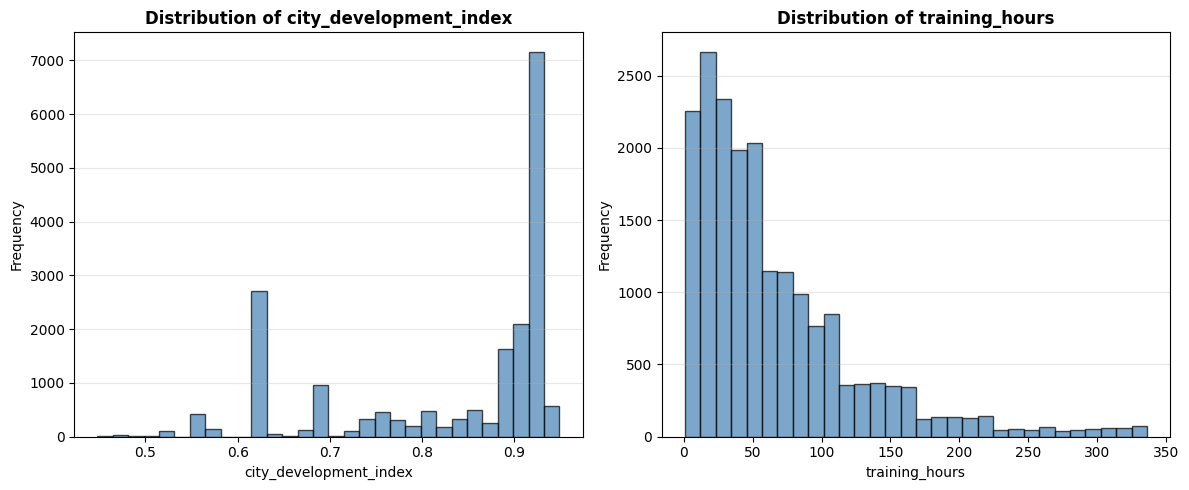

In [28]:
# Visualize distributions of numerical features (excluding enrollee_id and target)
numerical_features_for_viz = [col for col in numerical_cols if col not in ['enrollee_id', 'target']]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for idx, col in enumerate(numerical_features_for_viz):
    axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

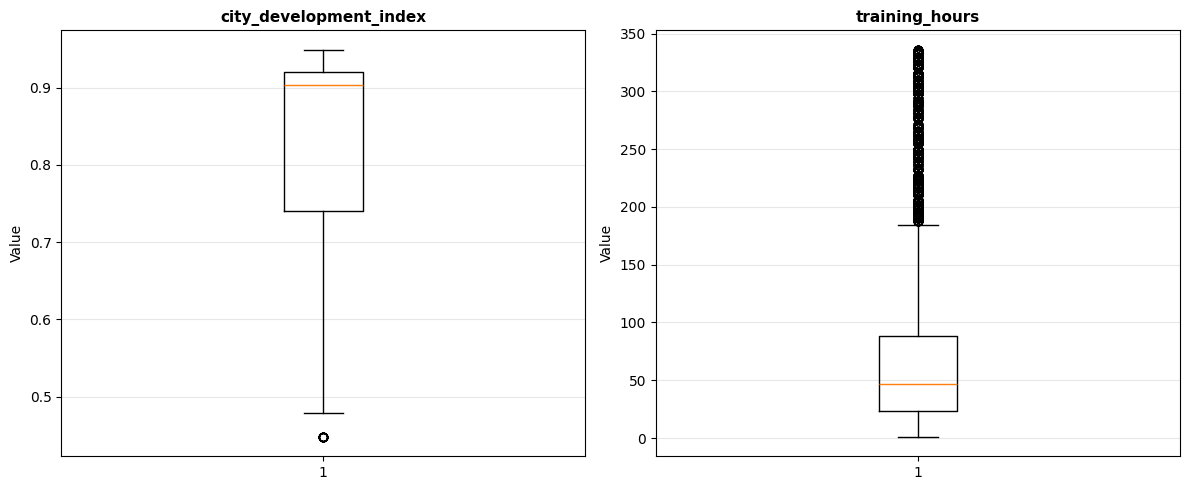

In [29]:
# Detect outliers using boxplots (excluding enrollee_id and target)
numerical_features_for_viz = [col for col in numerical_cols if col not in ['enrollee_id', 'target']]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for idx, col in enumerate(numerical_features_for_viz):
    axes[idx].boxplot(df[col].dropna(), vert=True)
    axes[idx].set_title(f'{col}', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Value')
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [30]:
# Quantitative outlier detection using IQR method (excluding enrollee_id and target)
print("=" * 60)
print("OUTLIER DETECTION (IQR METHOD)")
print("=" * 60)

numerical_features_for_analysis = [col for col in numerical_cols if col not in ['enrollee_id', 'target']]

for col in numerical_features_for_analysis:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    print(f"\n{col}:")
    print(f"  Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"  Bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"  Outliers detected: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)")
    
    if len(outliers) > 0:
        print(f"  Min outlier value: {df[col][outliers.index].min():.2f}")
        print(f"  Max outlier value: {df[col][outliers.index].max():.2f}")

OUTLIER DETECTION (IQR METHOD)

city_development_index:
  Q1: 0.74, Q3: 0.92, IQR: 0.18
  Bounds: [0.47, 1.19]
  Outliers detected: 17 (0.1%)
  Min outlier value: 0.45
  Max outlier value: 0.45

training_hours:
  Q1: 23.00, Q3: 88.00, IQR: 65.00
  Bounds: [-74.50, 185.50]
  Outliers detected: 984 (5.1%)
  Min outlier value: 188.00
  Max outlier value: 336.00


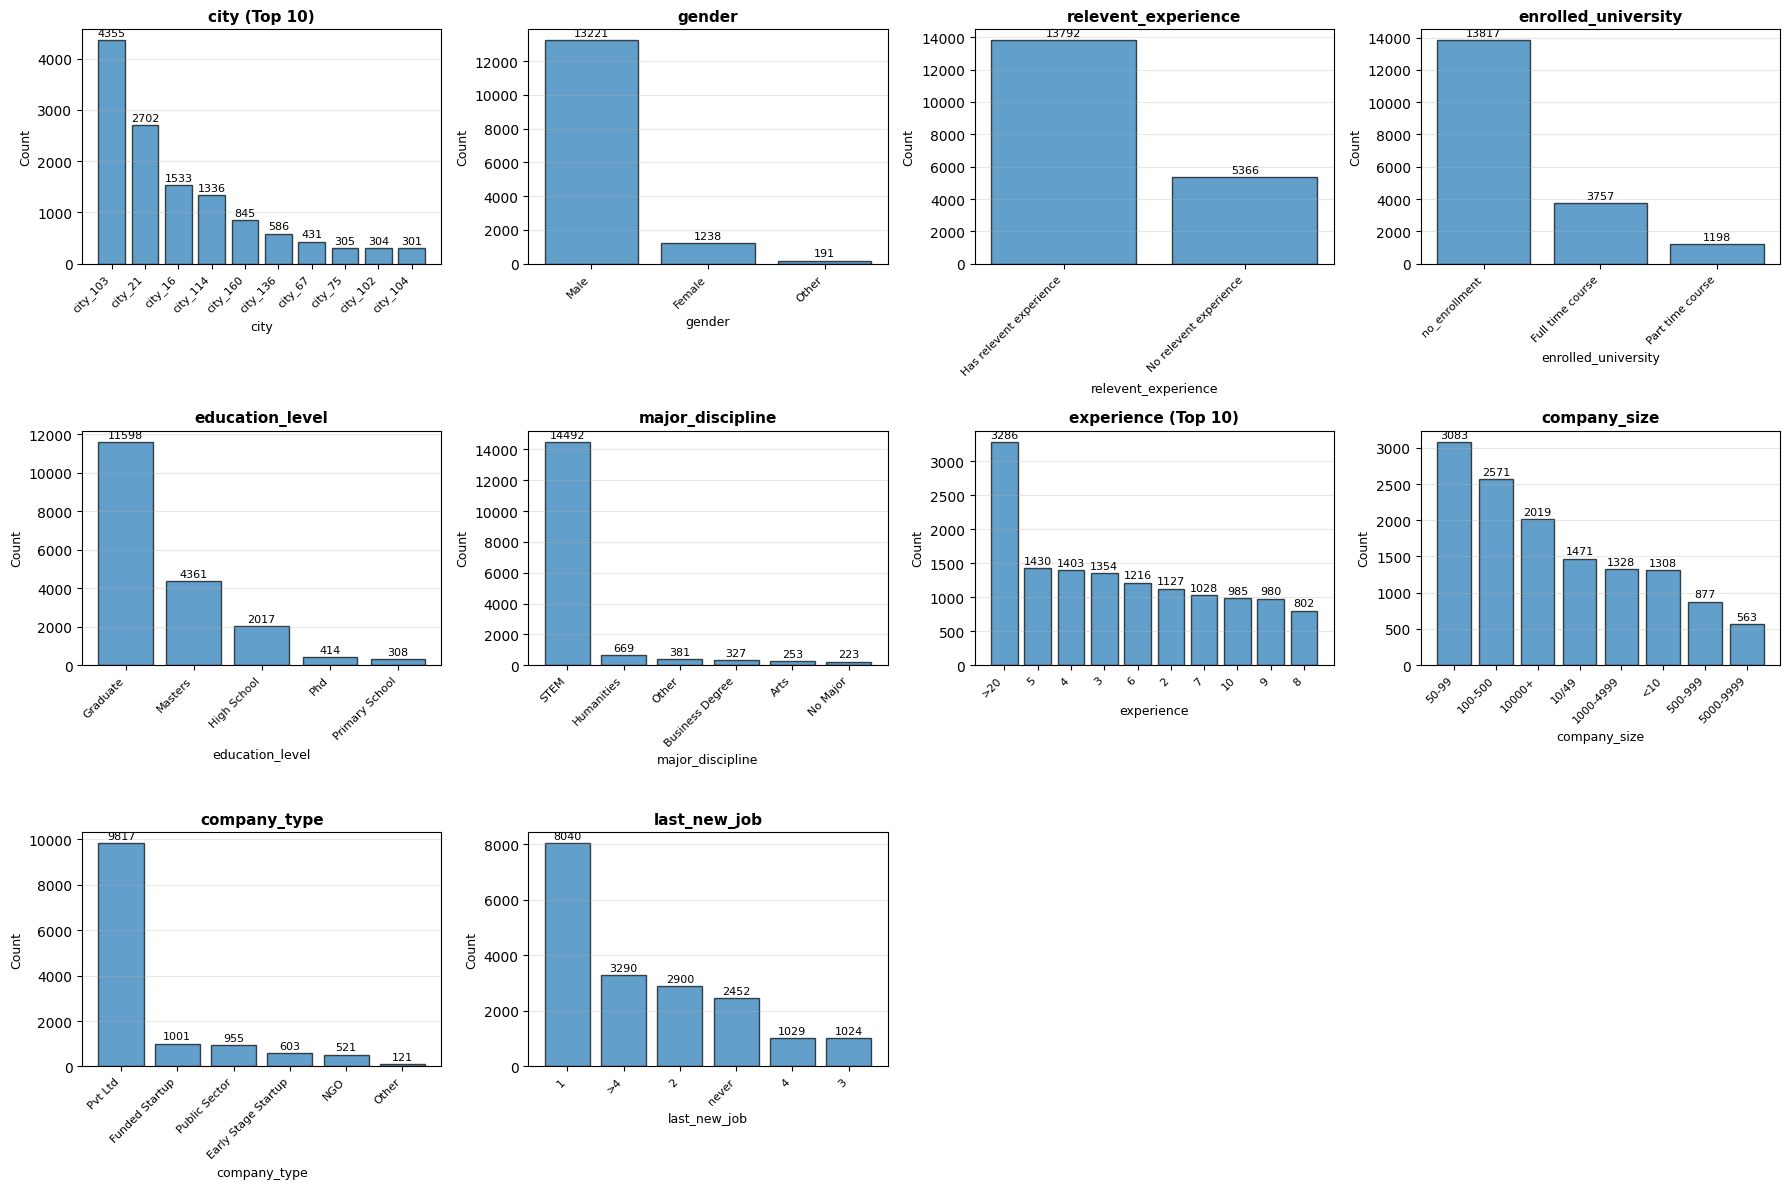

CATEGORICAL FEATURES - CARDINALITY SUMMARY
city: 123 unique values
gender: 3 unique values
relevent_experience: 2 unique values
enrolled_university: 3 unique values
education_level: 5 unique values
major_discipline: 6 unique values
experience: 22 unique values
company_size: 8 unique values
company_type: 6 unique values
last_new_job: 6 unique values


In [31]:
# Categorical features distribution (visualize top categories for high-cardinality features)
categorical_features = categorical_cols.copy()

fig, axes = plt.subplots(3, 4, figsize=(18, 12))
axes = axes.ravel()

for idx, col in enumerate(categorical_features[:10]):
    # For high-cardinality features, show only top 10
    value_counts = df[col].value_counts()
    
    if len(value_counts) > 10:
        value_counts = value_counts.head(10)
        title_suffix = " (Top 10)"
    else:
        title_suffix = ""
    
    axes[idx].bar(range(len(value_counts)), value_counts.values, edgecolor='black', alpha=0.7)
    axes[idx].set_xticks(range(len(value_counts)))
    axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right', fontsize=8)
    axes[idx].set_title(f'{col}{title_suffix}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel(col, fontsize=9)
    axes[idx].set_ylabel('Count', fontsize=9)
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Add count labels on bars
    for i, v in enumerate(value_counts.values):
        axes[idx].text(i, v + max(value_counts.values)*0.01, str(v), ha='center', va='bottom', fontsize=8)

# Remove empty subplots
for i in range(len(categorical_features[:10]), 12):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Print summary statistics for all categorical features
print("=" * 60)
print("CATEGORICAL FEATURES - CARDINALITY SUMMARY")
print("=" * 60)
for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} unique values")

#### Summary

**Numerical Feature Distributions:** The dataset contains only **two meaningful numerical predictors**. The `city_development_index` histogram reveals a **strongly left-skewed distribution** with a massive concentration at the highest development indices (0.9-0.95 range shows ~7,000+ candidates), indicating most training participants come from highly developed urban centers. The boxplot confirms minimal lower outliers around 0.448-0.47. In contrast, `training_hours` displays a **right-skewed distribution** with the mode at the lowest bins (0-50 hours showing ~2,700 candidates), followed by progressively decreasing frequencies toward higher training hours. The boxplot dramatically illustrates **extensive upper outliers** (984 instances, 5.1%) stretching from ~185 to 336 hours, representing candidates with exceptional training engagement far beyond the IQR upper bound of 88 hours.

**Outlier Analysis:** We will **retain all outliers** rather than remove them. The `city_development_index` outliers (17 instances, 0.1%) represent candidates from less-developed cities — a legitimate and potentially informative minority segment whose job-seeking behavior may differ from the urban majority. The `training_hours` outliers (984 instances, 5.1%) are particularly valuable: candidates investing 185-336 hours in training demonstrate extreme commitment that could strongly predict job change intentions, either indicating active upskilling for career transition or employer-mandated training for current roles. Removing these 5% of candidates would discard a behaviorally distinct cohort whose outlier status itself carries predictive signal. The outliers represent genuine behavioral variance, not measurement errors.

**Categorical Feature Distributions:** The visualizations reveal **pronounced imbalances across all features**. **City** (showing top 10 of 123) concentrates heavily in city_103 (4,355 candidates), with other cities having dramatically lower representation. **Gender** shows **strong male dominance** (13,221 males vs 1,238 females vs 191 other), creating a 10.7:1 imbalance. **Relevant experience** is heavily skewed toward "Has relevant experience" (13,792 vs 5,366). **Enrolled university** shows most are "no_enrollment" (13,817 vs 3,757 full-time vs 1,198 part-time). **Education level** is dominated by **Graduates** (11,598) followed by Masters (4,361), with minimal representation for High School, PhD, and Primary School. **Major discipline** overwhelmingly favors **STEM** (14,492), dwarfing Business Degree, Other, Humanities, Arts, and No Major. **Experience** (showing top 10 of 22 levels) shows broad distribution with ">20" years leading (3,286), but relatively balanced across 5-20 year ranges. **Company size** peaks at "50-99" (3,884) with decreasing frequencies for larger sizes. **Company type** is dominated by **"Pvt Ltd"** (10,817), far exceeding Funded Startup, Public Sector, Early Stage Startup, NGO, and Other. **Last new job** shows "1" year as most common (8,040), declining for longer gaps. These imbalances will require careful encoding strategies: target/frequency encoding for high-cardinality features (city, experience), one-hot encoding for low-cardinality features, and attention to class imbalance during model training to prevent bias toward majority classes.

### 4.4 Target Feature Study

In [ ]:
# Target variable distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Count plot
target_counts = df['target'].value_counts()
axes[0].bar(target_counts.index, target_counts.values, edgecolor='black', alpha=0.7, color=['red', 'green'])
axes[0].set_title('Target Distribution (Count)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Target (0=Not Looking, 1=Looking for Job Change)')
axes[0].set_ylabel('Count')
for i, v in enumerate(target_counts.values):
    axes[0].text(i, v + 100, str(v), ha='center', va='bottom', fontweight='bold')

# Pie chart
axes[1].pie(target_counts.values, labels=['Not Looking (0)', 'Looking (1)'], autopct='%1.1f%%', 
            startangle=90, colors=['red', 'green'], explode=(0.05, 0))
axes[1].set_title('Target Distribution (Proportion)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("=" * 60)
print("TARGET VARIABLE ANALYSIS")
print("=" * 60)
print(f"\nClass distribution:")
print(target_counts)
print(f"\nClass proportions:")
print(df['target'].value_counts(normalize=True).round(3))
print(f"\nClass imbalance ratio: {target_counts.max() / target_counts.min():.2f}:1")

In [ ]:
# Numerical features comparison by target class
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

# Exclude enrollee_id from comparison (it's just an identifier)
numerical_features_for_comparison = [col for col in numerical_cols if col not in ['enrollee_id', 'target']]

for idx, col in enumerate(numerical_features_for_comparison):
    looking = df[df['target'] == 1.0][col]
    not_looking = df[df['target'] == 0.0][col]
    
    axes[idx].hist([not_looking, looking], bins=15, label=['Not Looking (0)', 'Looking (1)'], 
                   edgecolor='black', alpha=0.7, color=['red', 'green'])
    axes[idx].set_title(f'{col} by Target', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend()
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Statistical comparison of numerical features by target class
print("=" * 60)
print("NUMERICAL FEATURES - MEAN COMPARISON BY TARGET")
print("=" * 60)

numerical_features_for_comparison = [col for col in numerical_cols if col not in ['enrollee_id', 'target']]
comparison = df.groupby('target')[numerical_features_for_comparison].mean()
comparison.index = ['Not Looking (0)', 'Looking (1)']
print("\nMean values by target class:")
print(comparison.round(2))

print("\n" + "=" * 60)
print("DIFFERENCE (Looking - Not Looking)")
print("=" * 60)
difference = comparison.loc['Looking (1)'] - comparison.loc['Not Looking (0)']
print(difference.round(2))

# Visualize mean comparison
comparison.T.plot(kind='bar', figsize=(10, 5), edgecolor='black', alpha=0.7, color=['red', 'green'])
plt.title('Mean Comparison of Numerical Features by Target', fontsize=13, fontweight='bold')
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Target')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Categorical features vs target - job change rates
categorical_features_for_analysis = [col for col in categorical_cols]

# Limit to top categories for high-cardinality features like 'city'
fig, axes = plt.subplots(3, 4, figsize=(18, 12))
axes = axes.ravel()

for idx, col in enumerate(categorical_features_for_analysis[:10]):
    if col == 'city':
        # For city, show only top 10 cities
        top_cities = df[col].value_counts().head(10).index
        df_subset = df[df[col].isin(top_cities)]
        ct = pd.crosstab(df_subset[col], df_subset['target'], normalize='index') * 100
    else:
        ct = pd.crosstab(df[col], df['target'], normalize='index') * 100
    
    ct.plot(kind='bar', ax=axes[idx], edgecolor='black', alpha=0.7, color=['red', 'green'])
    axes[idx].set_title(f'Job Change Rate by {col}', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Percentage (%)')
    axes[idx].legend(['Not Looking (0)', 'Looking (1)'], fontsize=7)
    axes[idx].tick_params(axis='x', rotation=45, labelsize=8)
    axes[idx].grid(axis='y', alpha=0.3)

# Remove empty subplots
for i in range(len(categorical_features_for_analysis[:10]), 12):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

#### Summary

The target variable analysis will be completed after running the visualization cells above. This section examines the relationship between predictor features and placement outcomes, revealing which characteristics are most strongly associated with successful job placement. Key areas of investigation include class imbalance quantification, numerical feature differences between placed and not-placed students, and placement rate variations across categorical features. These insights will inform feature selection and model training strategies in subsequent sections.

### 4.5 Feature Correlation & Selection

### 4.6 Unsupervised Clustering

### 4.7 Interpretations & Conclusions

---

## 5. ML Baseline & Ensemble Models

### 5.1 Train/Validation/Test Splits

### 5.2 Pipelines & Models

### 5.3 Training & Validation

### 5.4 Testing

### 5.5 Results Interpretation & Discussion

---

## 6. Enhanced Models & Hyperparameter Tuning

### 6.1 Justification of Choices

### 6.2 Hyperparameter Optimization

### 6.3 Final Results & Analysis

---

## 7. Conclusion